## 주성분 분석

### PCA 클래스

**차원 축소**란 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시키는 방법<br>
대표적인 차원 축소 알고리즘인 **주성분 분석(=PCA)**을 배움<br><br>
주성분 분석은 데이터가 널리 퍼져있는 정도를 나타내는 분산이 큰 방향을 찾는 것<br>
주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듦(원본이 가지고 있는 특성을 잘 나타냄)<br>
주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음<br>
두 번째 주성분은 첫 번째 주성분 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾음

![주성분 분석](https://thebook.io/img/007019/097.jpg)

In [1]:
import numpy as np

fruits=np.load('fruits_300_data')
fruits_2d=fruits.reshape(-1,10000)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #주성분 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
#PCA 클래스가 찾은 주성분이 저장됨
#50으로 지정해서 첫 번째 차원이 50, 원본 데이터 특성 개수가 10,000이라서 두 번쨰 차원은 10,000
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림, 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

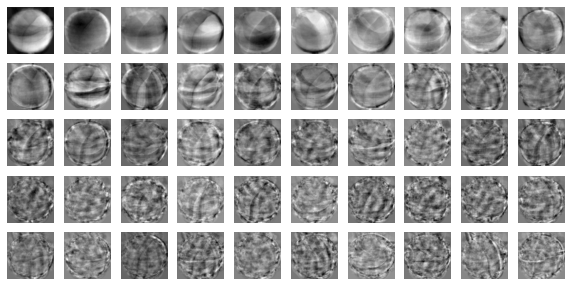

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))#원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

In [6]:
print(fruits_2d.shape) #10,000개의 픽셀(특성)을 가진 300개의 이미지

(300, 10000)


In [7]:
fruits_pca=pca.transform(fruits_2d) #10,000개에서 50개로 데이터 차원을 줄임

In [8]:
print(fruits_pca.shape) #(300,50) 크기의 배열로 변환, 50개의 특성을 가진 데이터임

(300, 50)


### 원본 데이터 재구성

In [9]:
fruits_inverse=pca.inverse_transform(fruits_pca) #10,000개의 특성 복원
print(fruits_inverse.shape)

(300, 10000)


In [10]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100) #100x100 크기로 바꿈

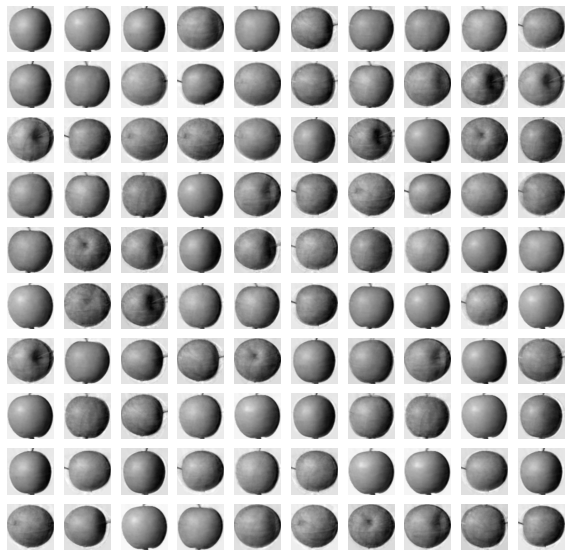

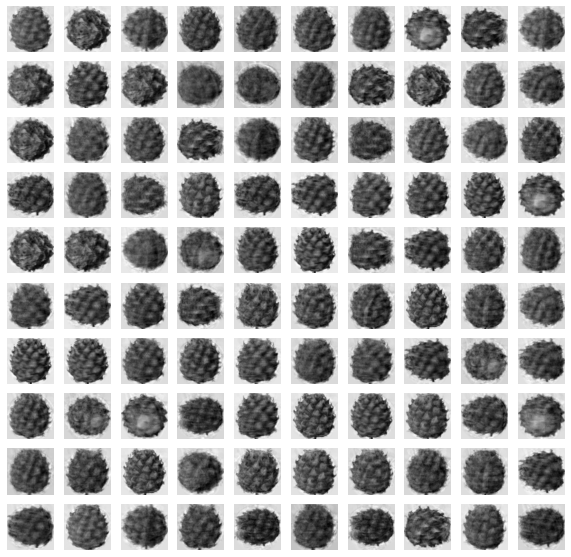

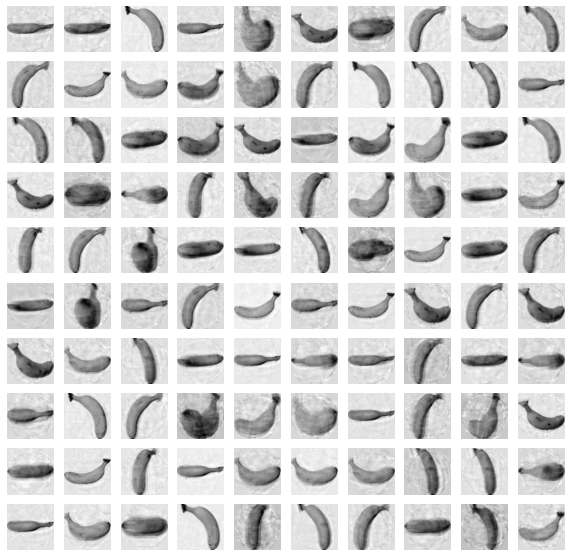

In [11]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

### 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산**이라고 함<br>
당연히 첫 번째 주성분의 설명된 분산이 가장 큼

In [12]:
#각 주성분의 설명된 분산 비율이 기록되고 다 더함
print(np.sum(pca.explained_variance_ratio_)) #92%가 넘는 분산 유지

0.9215184680732589


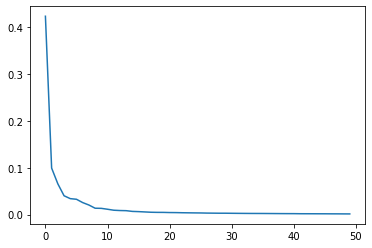

In [13]:
plt.plot(pca.explained_variance_ratio_)#처음 10개의 주성분이 대부분의 분산을 포현하고 있음

### 다른 알고리즘과 함께 사용하기

In [14]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [17]:
target=np.array([0]*100+[1]*100+[2]*100) #파인애플: 0, 바나나: 1, 사과: 2 로 지정

In [18]:
from sklearn.model_selection import cross_validate

scores=cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score'])) #교차검증의 점수는 매우 높으며 금방 과대적합된 모델 만들기 쉬움
print(np.mean(scores['fit_time'])) #각 교차 검증 폴드의 훈련 시간 기록

0.9966666666666667
0.2635651588439941


In [19]:
scores=cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score'])) #50개의 특성만 사용했는데 정확도 100%
print(np.mean(scores['fit_time'])) #훈련시간도 감소

1.0
0.017152023315429688


In [20]:
pca=PCA(n_components=0.5) #주성분의 개수가 아닌 설명된 분산의 비율 입력
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_) #단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음

2


In [22]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape) #주성분이 2개이므로 변환된 데이터의 크기는 (300,2)

(300, 2)


In [23]:
#2개의 특성만으로 교차검증 확인
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score'])) #99개의 정확도를 달성
print(np.mean(scores['fit_time']))

0.99
0.027317905426025392


C:\Users\20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
#차원 축소된 데이터를 이용하여 k-평균 알고리즘으로 클러스터 찾음
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [25]:
print(np.unique(km.labels_,return_counts=True)) #각각 91개, 99개, 110개, 원본 데이터와 비슷

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


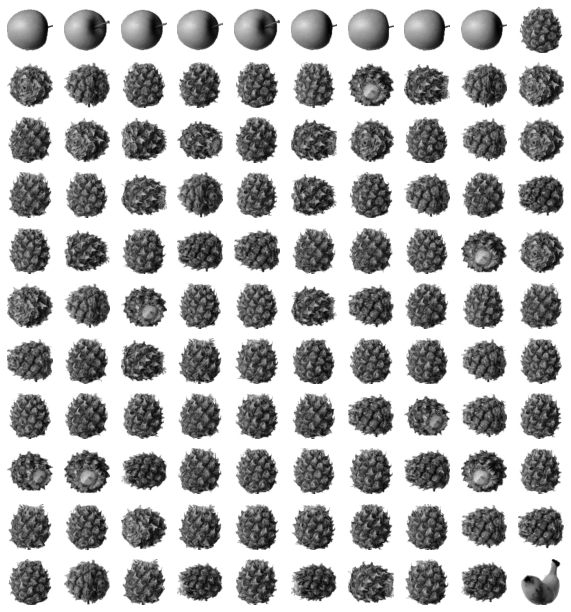

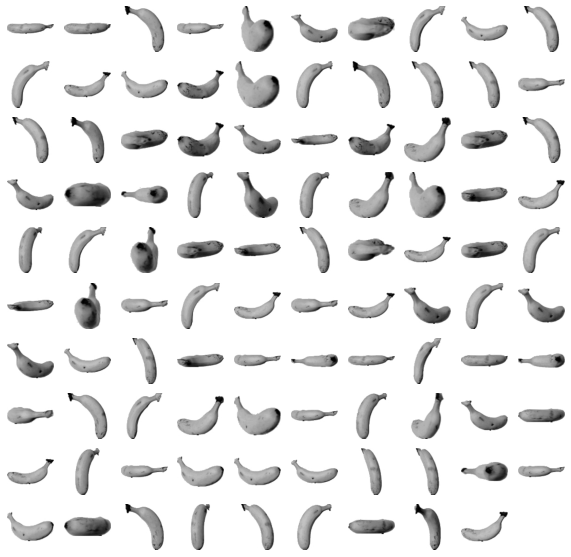

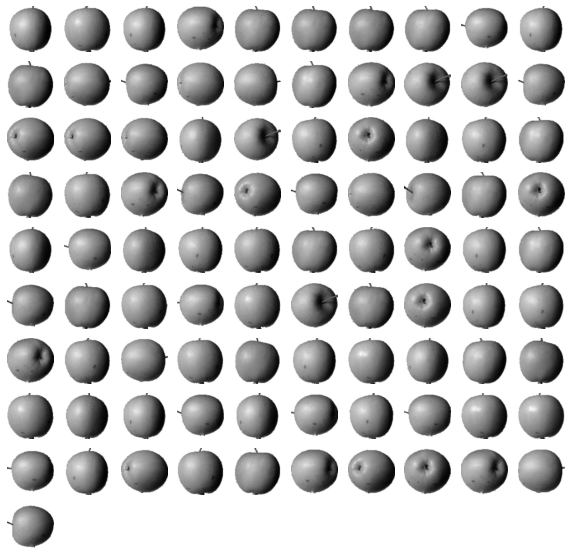

In [26]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

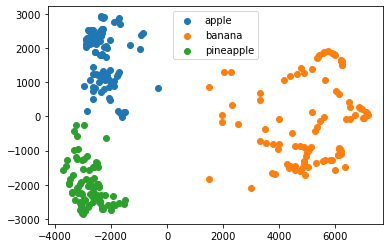

In [27]:
#fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있음
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()